# Python for Control

# Section 1: Basics of Python
## 1.1 Introduction to Deepnote

## 1.2 Numpy Array vs Numpy Matrix
- 1D array is NOT a vector



In [ ]:
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
a1 = np.array([1,2,3])
a2 = np.array([[1,2,3]])

print(a1.shape)
print(a1.T)
print(A@a1)

print(a2.T)
print(A@a2.T)

- Numpy matrix 

In [ ]:
m1 = np.mat(a1)
m2 = np.mat(a2)
print(m1)
print(m2)

In [ ]:


A1 = np.mat('1')
A2 = np.mat('1,2,3')
A3 = np.mat('1,2,3;4,5,6;7,8,9')

#print(A1.shape, A2.shape, A3.shape, sep = '\n')

##1.3 Matrix Block Operations

In [ ]:
import scipy.linalg as la

A = np.mat('1,2,3;4,5,6;7,8,9')
B = np.mat('2,3;4,5')
b = np.mat('-1,-2')
C = np.mat('1,4;2,5;3,6')
d = np.mat('-1;-2;-3')

#basic matrix construction
# print(np.identity(4))
# print(np.zeros((3,3)))
# print(9*np.ones((3,3)))
# print(9*np.ones_like(C))

#block diagonal
#print(la.block_diag(A,B,b,C,d))

#kron 
#print(np.kron(np.identity(4),A))
#print(np.kron(np.ones((4,1)),b))

#block operations
G4 = np.hstack([A,C,C,C,C,A])
G6 = np.vstack([B,b])

G5 = np.block([[A,G6],[np.zeros((3,3)),C]])

print(G5)

# Section 2:  Simulation of Dynamic Systems




## 2.1 Example 1: Pendulum Simulation
<center><img src="figs/pendulum.png" width="140px"/></center>

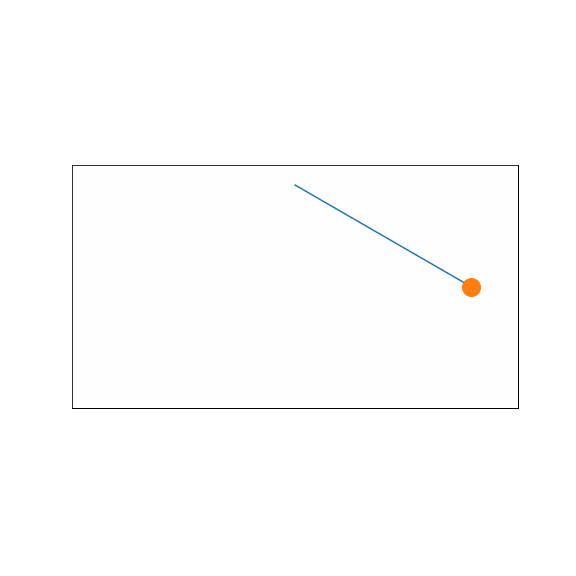

In [ ]:
from IPython.display import Image
Image(filename="pen.gif")

## Equations of Motion 
<center><img src="figs/pendulum.png" width="150px"/></center>

$I\ddot\theta = \text{total torque} \Rightarrow ML^2\ddot \theta =  u - d\dot\theta - MgL\sin(\theta)$

**Change to state space form:** Let $x_1 = \theta$, $x_2 = \dot \theta$

$\begin{cases}\dot x_1 =  x_2 \\ 
\dot x_2 = u- \frac{d}{ML^2}x_2 - \frac{g}{L} \sin(x_1)\end{cases}$




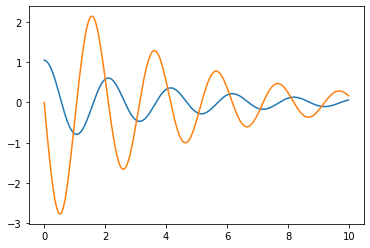

In [ ]:
# simulate free-fall from given initial condition
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

def pendulum_ode(x,t):
    x1,x2 = x    
    u = 0 # zero torque control
    x1_dot = x2
    x2_dot = u-d*x2/(M*L**2) - g/L*np.sin(x1)
    return [x1_dot,  x2_dot]


M = 1
L = 1
g = 9.81
d = 0.5
t_length = 10  # 10 second of simulation
dt = 0.02
times = np.arange(0,t_length,dt)
x_init = [np.pi/3, 0]

x_traj = odeint(pendulum_ode, x_init, times)
plt.plot(times,x_traj[:,0])
plt.plot(times,x_traj[:,1])


### Compare odeint simulation results with Euler method

**Euler Method:**  
- Given ODE: $\dot x = f(x,u,t)$ 
- choose step size h>0, and apply Euler method: $x(t+h) = x(t) + f(x,u,t)\cdot h$
- Start from time zero and update at discrete time $h,2h,\ldots, kh, (k+1)h,\ldots$
- $x(k+1) = x(k)+f(x(k),u(k),kh)\cdot h$
- It is a first order method, requiring small step size

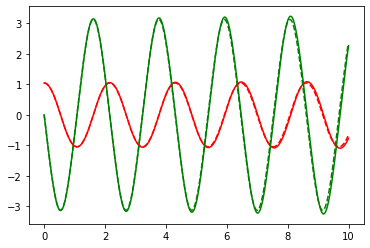

In [ ]:
# 
t_length = 10  # 10 second of simulation
h = 0.001
times_hat = np.arange(0,t_length,h)
Nsteps = times_hat.shape[0]
xhat_traj = np.zeros((Nsteps,2))
xhat_traj[0,:] = np.array(x_init)    #initialization


for i in range(Nsteps-1):    
    xdot = pendulum_ode(xhat_traj[i,:],i*h)
    xhat_traj[i+1,:] = xhat_traj[i,:] + np.array(xdot)*h


plt.plot(times_hat,xhat_traj[:,0],'r')
plt.plot(times_hat,xhat_traj[:,1],'g')

plt.plot(times,x_traj[:,0],'r--')
plt.plot(times,x_traj[:,1],'g--')
    


Now let's animate the pendulum motion

In [ ]:
from IPython import display
from matplotlib import animation

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.get_xaxis().set_ticks([])    
ax.get_yaxis().set_ticks([])    
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,0.1)
ax.set_aspect('equal', adjustable='box')

ln1, = plt.plot([],[])
ln2, = plt.plot([],[],marker = 'o',ms = 18)

def animate_pendulum(i): 
    theta = x_traj[i,0]
    ln1.set_data([0,np.sin(theta)],[0, -np.cos(theta)])
    ln2.set_data(np.sin(theta),-np.cos(theta))

n_frame = np.rint(t_length/dt).astype(int)
ani = animation.FuncAnimation(fig, animate_pendulum, frames=n_frame, interval=20)
ani.save('pen2.gif',writer='pillow',fps=50)
plt.close()


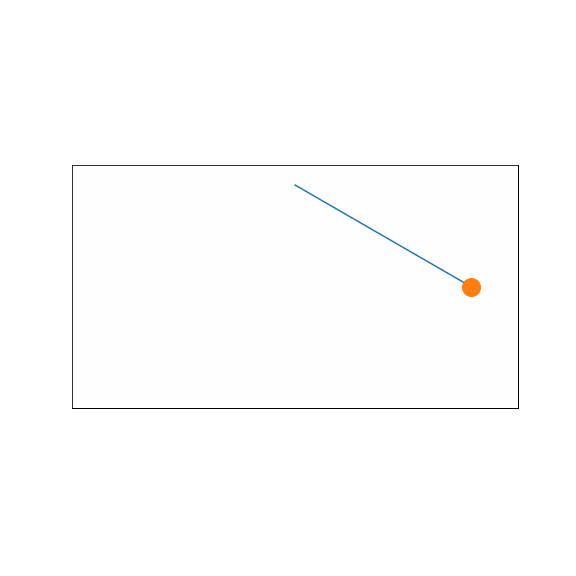

In [ ]:
from IPython.display import Image
Image(filename="pen2.gif")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b4980b8-fec2-4c7b-8ac4-6d07d1d79b94' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>